In [1]:
import abc
import dataclasses
from typing import List, Optional, Sequence, Tuple

from absl import logging
import cv2
import numpy as np
import scipy
import skimage
import skimage.measure
import skimage.morphology
import rasterio
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from PIL import Image
import numpy as np

In [2]:
# The down_scale function is designed to downscale a boolean raster image by a specified downscaling factor.

def down_scale(raster: np.ndarray, down_scale_factor: int, fraction: float = 0.1) -> np.ndarray:
    b = raster.shape[0] // down_scale_factor
    return raster.reshape(-1, down_scale_factor, b, down_scale_factor).mean(
        (-1, -3)) > fraction

# Example input
input_raster = np.array([[True, False, True, False],
                        [False, True, True, True],
                        [True, False, True, True],
                        [False, True, False, False]])

down_scale_factor = 2

# Call the function
output = down_scale(input_raster, down_scale_factor)
print(input_raster.shape)

# Print the output
print("Input Raster:")
print(input_raster)

print("\nDownscaled Raster:")
print(output)

(4, 4)
Input Raster:
[[ True False  True False]
 [False  True  True  True]
 [ True False  True  True]
 [False  True False False]]

Downscaled Raster:
[[ True  True]
 [ True  True]]


In [3]:
with rasterio.open('June_Sep_2001_2012_binary/Inundation Boundary (08AUG2012 00 00 00 Value_0).tif') as src:
    # Read the DEM data
    tiff_image = src.read(1)  # Assuming the DEM is a single-band raster
    print("width",src.width)
    print("height",src.height)


width 516
height 291


(291, 516)
Input Raster:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(288, 512)

Downscaled Raster:
[[False False False ...  True  True False]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 ...
 [ True False False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]
(36, 64)


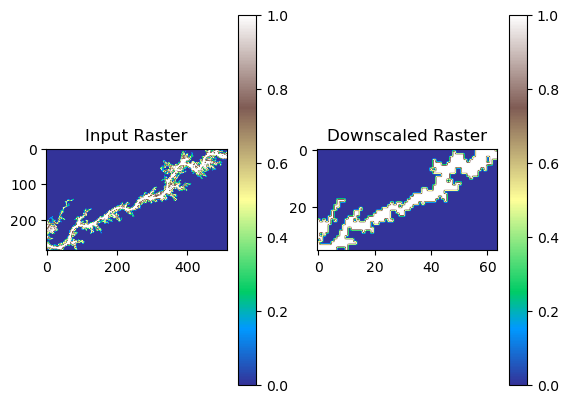

In [4]:
def down_scale(raster: np.ndarray, down_scale_factor: int, fraction: float = 0.1) -> np.ndarray:
    b = raster.shape[1] // down_scale_factor
    return raster.reshape(-1, down_scale_factor, b, down_scale_factor).mean(
        (-1, -3)) > fraction


# Resize the image to dimensions that are evenly divisible by the downscaling factor
down_scale_factor = 8
height, width = tiff_image.shape
new_height = height - (height % down_scale_factor)
new_width = width - (width % down_scale_factor)
tiff_image_resized = tiff_image[:new_height, :new_width]

# Call the down_scale function
output = down_scale(tiff_image_resized, down_scale_factor)

print(tiff_image.shape)

# Print the output
print("Input Raster:")
print(tiff_image_resized)
print(tiff_image_resized.shape)

print("\nDownscaled Raster:")
print(output)
print(output.shape)


# Input Raster
plt.subplot(1, 2, 1)
plt.imshow(tiff_image_resized, cmap='terrain')
plt.title("Input Raster")
plt.colorbar()

# Downscaled Raster
plt.subplot(1, 2, 2)
plt.imshow(output, cmap='terrain')
plt.title("Downscaled Raster")
plt.colorbar()

plt.show()



In [5]:
import rasterio

# Load the TIFF image
with rasterio.open("Inundation Boundary (20AUG2012 00 00 00 Value_0).tif") as src:
    tiff_image = src.read(1)

# Resize the image to dimensions that are evenly divisible by the downscaling factor
down_scale_factor = 8
height, width = tiff_image.shape
new_height = height - (height % down_scale_factor)
new_width = width - (width % down_scale_factor)
tiff_image_resized = tiff_image[:new_height, :new_width]

# Define the output file name
output_file = "resized_inundation_boundary.tif"

# Export the resized TIFF image
with rasterio.open(output_file, 'w', driver='GTiff', height=tiff_image_resized.shape[0], width=tiff_image_resized.shape[1], count=1, dtype=str(tiff_image_resized.dtype)) as dst:
    dst.write(tiff_image_resized, 1)

print(f"Resized image saved as {output_file}")


Resized image saved as resized_inundation_boundary.tif


/Users/amanchaudhary/anaconda3/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


In [10]:
import rasterio
from rasterio.crs import CRS

# Load the TIFF image
with rasterio.open("Inundation Boundary (20AUG2012 00 00 00 Value_0).tif") as src:
    tiff_image = src.read(1)

# Resize the image to dimensions that are evenly divisible by the downscaling factor
down_scale_factor = 8
height, width = tiff_image.shape
new_height = height - (height % down_scale_factor)
new_width = width - (width % down_scale_factor)
tiff_image_resized = tiff_image[:new_height, :new_width]

# Define the output file name
output_file = "resized_inundation_boundary.tif"


with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(tiff_image_resized, 1)

print(f"Resized image saved as {output_file}")


Resized image saved as resized_inundation_boundary.tif


In [3]:
import os
import rasterio

# Directory containing the TIFF files
input_folder = "2012_CRS4326_binary"

# Output folder for resized images
output_folder = "2012_CRS4326_binary_resized"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
tiff_files = [file for file in os.listdir(input_folder) if file.endswith(".tif")]

# Process each TIFF file
for tiff_file in tiff_files:
    input_path = os.path.join(input_folder, tiff_file)

    # Load the TIFF image
    with rasterio.open(input_path) as src:
        tiff_image = src.read(1)
        profile = src.profile  # Retrieve the profile including the CRS

    # Resize the image to dimensions that are evenly divisible by the downscaling factor
    down_scale_factor = 8
    height, width = tiff_image.shape
    new_height = height - (height % down_scale_factor)
    new_width = width - (width % down_scale_factor)
    tiff_image_resized = tiff_image[:new_height, :new_width]

    # Define the output file path
    output_path = os.path.join(output_folder, f"{tiff_file}")

    # Export the resized TIFF image with the same CRS
    with rasterio.open(output_path, 'w', **profile) as dst:
        dst.write(tiff_image_resized, 1)

    print(f"Resized image saved as {output_path}")


Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (16OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (18OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (27AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (04JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (29AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (11JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (03OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (23SEP2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (09SEP2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Bo

Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (20AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (18JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (16JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (04OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (24SEP2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (20OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (11AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (04AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (27JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Bo

In [2]:
import os
import rasterio

# Directory containing the TIFF files
input_folder = "2012_CRS4326_binary"

# Output folder for resized images
output_folder = "2012_CRS4326_binary_resized"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# List all files in the input folder
tiff_files = [file for file in os.listdir(input_folder) if file.endswith(".tif")]

# Process each TIFF file
for tiff_file in tiff_files:
    input_path = os.path.join(input_folder, tiff_file)

    # Load the TIFF image
    with rasterio.open(input_path) as src:
        tiff_image = src.read(1)

    # Resize the image to dimensions that are evenly divisible by the downscaling factor
    down_scale_factor = 8
    height, width = tiff_image.shape
    new_height = height - (height % down_scale_factor)
    new_width = width - (width % down_scale_factor)
    tiff_image_resized = tiff_image[:new_height, :new_width]
    
    crs = src.crs

    # Define the output file path
    output_path = os.path.join(output_folder, f"{tiff_file}")

    with rasterio.open(output_path, 'w', driver='GTiff', height=tiff_image_resized.shape[0], width=tiff_image_resized.shape[1], count=1, dtype=str(tiff_image_resized.dtype), crs=crs) as dst:
        dst.write(tiff_image_resized, 1)
    

    print(f"Resized image saved as {output_path}")


/Users/amanchaudhary/anaconda3/lib/python3.10/site-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = writer(


Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (16OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (18OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (27AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (04JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (29AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (11JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (03OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (23SEP2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (09SEP2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Bo

Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (20AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (18JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (16JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (04OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (24SEP2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (20OCT2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (11AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (04AUG2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Boundary (27JUN2012 00 00 00 Value_0).tif
Resized image saved as 2012_CRS4326_binary_resized/Inundation Bo